In [46]:
import tensorflow as tf

In [47]:
from tensorflow import keras

In [48]:
from keras.preprocessing import image

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
img = image.load_img("/content/img_p1_7.jpeg", target_size=(200,200))

In [53]:
import matplotlib.pyplot as plt


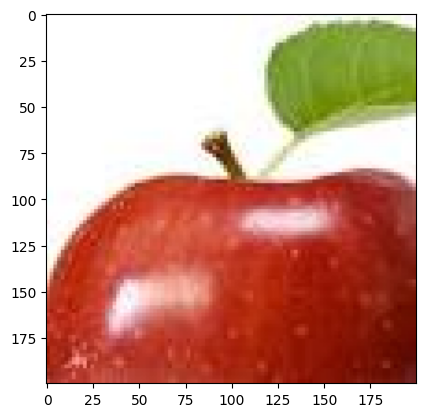

In [54]:
plt.imshow(img)

In [55]:
datagen = ImageDataGenerator(
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [56]:
datagen

In [57]:
img = image.img_to_array(img)

In [58]:
print(img.shape)

(200, 200, 3)


In [59]:
datagen.flow

<bound method ImageDataGenerator.flow of <keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x7d2a206ac740>>

In [62]:
input_batch = img.reshape(1,200,200,3)

In [64]:
i = 0
for output in datagen.flow(input_batch,batch_size=1,save_to_dir='aug'):
  i = i + 1
  if i == 100:
    break

In [1]:
!nvidia-smi

Sun Jan 11 08:45:38 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification


Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0
  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 987MB/s]


In [5]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  infla

In [8]:
## image resizing
IMAGE_SIZE = [224 , 224]

In [9]:
train_path = '/content/train'

In [35]:
valid_path = '/content/test'

In [10]:
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing import image

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [15]:
import numpy as np

In [17]:
from glob import glob

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.models import Model

In [20]:
from tensorflow.keras.layers import Input , Conv2D , Dense  , Flatten , MaxPooling2D

In [21]:
folders = glob('/content/train/*')
folders

['/content/train/tomatoes', '/content/train/apples']

In [22]:
num_of_class = len(folders)
num_of_class

2

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# view the structure of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,281 (42.64 MB)

 Trainable params: 11,177,281 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [30]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
train_path

'/content/train'

In [32]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 294 images belonging to 2 classes.


In [36]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 97 images belonging to 2 classes.


In [37]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 795ms/step - accuracy: 0.4295 - loss: 1.6054 - val_accuracy: 0.6186 - val_loss: 0.6610
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - accuracy: 0.6432 - loss: 0.6333 - val_accuracy: 0.6289 - val_loss: 0.6265
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.7305 - loss: 0.5734 - val_accuracy: 0.6495 - val_loss: 0.6120
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.6931 - loss: 0.5856 - val_accuracy: 0.6495 - val_loss: 0.6011
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.7208 - loss: 0.5814 - val_accuracy: 0.6701 - val_loss: 0.6002
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.6817 - loss: 0.5697 - val_accuracy: 0.7010 - val_loss: 0.5286
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step - accuracy: 0.7597 - loss: 0.5058 - val_accuracy: 0.7732 - val_loss: 0.5162
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.7570 - loss: 0.4606 - val_accuracy: 0

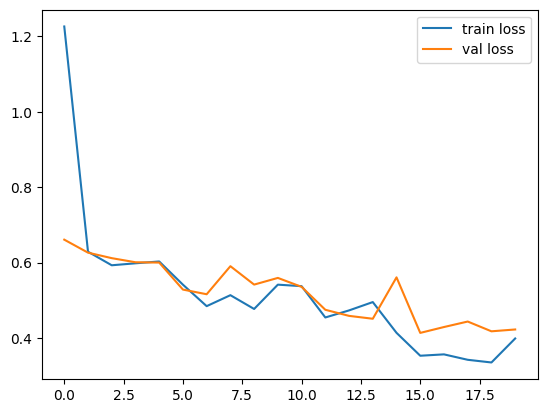

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

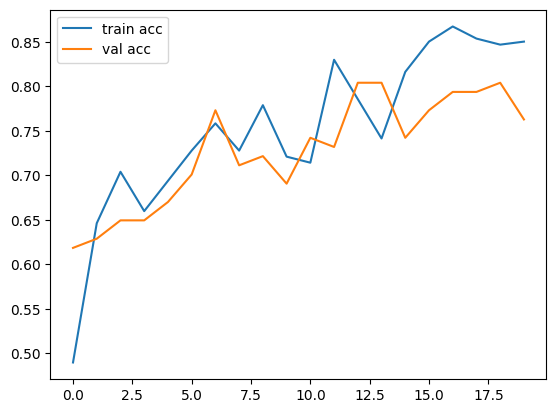

<Figure size 640x480 with 0 Axes>

In [39]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:

model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7979 - loss: 0.3733


[0.422756552696228, 0.7628865838050842]

In [41]:

model.save('model.h5')

In [43]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model("model.h5")

In [45]:

from tensorflow.keras.preprocessing import image

In [65]:
img=image.load_img('/content/aug/_0_1288.png',target_size=(224,224))

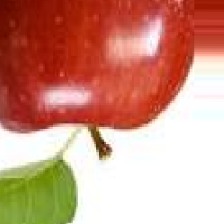

In [66]:
img

In [67]:
import numpy as np

In [68]:
x=image.img_to_array(img)
x=x/255

x=np.expand_dims(x,axis=0)
output = model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
[[0.170559]]


In [69]:
x.shape




(1, 224, 224, 3)

In [70]:

output[0][0]

np.float32(0.170559)

In [71]:

if output[0][0] >=0.5:
    prediction = 'Tomato'
    print(prediction)
else:
    prediction = 'Apple'
    print(prediction)

Apple
